### Hierarchical Clustering, t-SNE and Dimension Reduction with PCA & SVD

In [6]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  

In [7]:
customer_data = pd.read_csv('shopping_data.csv')  


In [8]:
customer_data.head()  
#customer_data.shape 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender. Execute the following script to filter the first three columns from our dataset:



In [9]:
data = customer_data.iloc[:, 3:5].values  

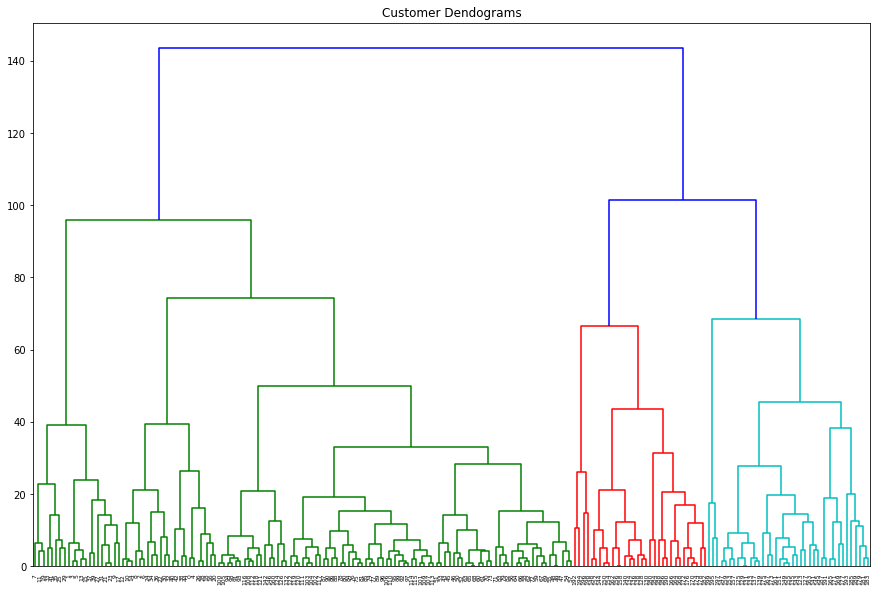

[2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 5 3 5 3 5 4 5 4 5 3 5 4 5 4 5 4 5 4 5 3 5 4 5 3 5
 4 5 4 5 4 5 4 5 4 5 4 5 3 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4
 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5]


In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
plt.figure(figsize=(15, 10))  
plt.title("Customer Dendograms")
mergings = linkage(data, method='complete')#ward)

labels = fcluster(mergings, 70, criterion='distance')
dendrogram(mergings,leaf_rotation=90,leaf_font_size=6)
plt.show()

print(labels)





##### Alternative to SciPy, we can use Sklearn

In [11]:
from sklearn.cluster import AgglomerativeClustering

#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html

cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)  


array([ 4,  0,  8,  0,  4,  0,  8,  0,  8,  0,  8,  0,  8,  0,  8,  0,  4,
        0,  4,  0,  4,  0,  8,  0,  8,  0,  4,  0,  4,  0,  8,  0,  8,  0,
        8,  0,  8,  0,  4,  0,  4,  0,  4,  3,  4,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  6,  6,  3,  6,  3,  6,  6,  3,  3,  6,
        3,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  9, 10,  1, 10,  9,  5,  1,  5,  1, 10,  1,  5,  9,
        5,  1,  5,  1,  5,  9, 10,  9,  5,  9, 10,  1,  5,  9,  5,  9,  5,
        1,  5,  9,  5,  1,  5,  1, 10,  9,  5,  9,  5,  1,  5,  9,  5,  1,
        5,  1,  5,  9,  5,  9,  5,  1,  5,  7,  2,  7,  5,  7,  2,  7,  2,
        1,  2,  7,  2,  1,  2,  7,  2, 11,  2, 11,  2, 11])

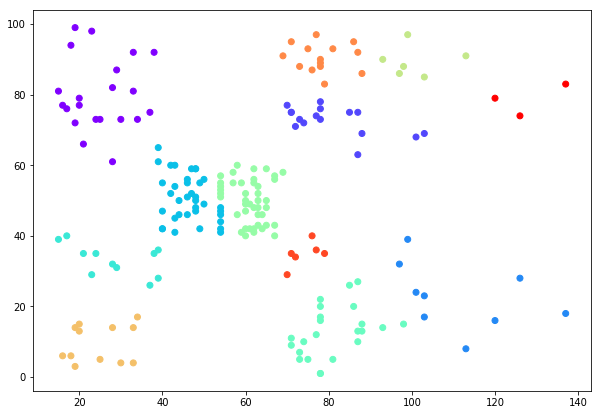

In [12]:
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')  

#https://www.quora.com/What-is-the-difference-between-k-means-and-hierarchical-clustering

In [13]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")



In [14]:
wheat_features=np.array([[ 14.88  ,  14.57  ,   0.8811,   5.554 ,   3.333 ,   1.018 ,   4.956 ],
       [ 14.69  ,  14.49  ,   0.8799,   5.563 ,   3.259 ,   3.586 ,   5.219 ],
       [ 14.03  ,  14.16  ,   0.8796,   5.438 ,   3.201 ,   1.717 ,   5.001 ],
       [ 13.99  ,  13.83  ,   0.9183,   5.119 ,   3.383 ,   5.234 ,   4.781 ],
       [ 14.11  ,  14.26  ,   0.8722,   5.52  ,   3.168 ,   2.688 ,   5.219 ],
       [ 13.02  ,  13.76  ,   0.8641,   5.395 ,   3.026 ,   3.373 ,   4.825 ],
       [ 15.49  ,  14.94  ,   0.8724,   5.757 ,   3.371 ,   3.412 ,   5.228 ],
       [ 16.2   ,  15.27  ,   0.8734,   5.826 ,   3.464 ,   2.823 ,   5.527 ],
       [ 13.5   ,  13.85  ,   0.8852,   5.351 ,   3.158 ,   2.249 ,   5.176 ],
       [ 15.36  ,  14.76  ,   0.8861,   5.701 ,   3.393 ,   1.367 ,   5.132 ],
       [ 15.78  ,  14.91  ,   0.8923,   5.674 ,   3.434 ,   5.593 ,   5.136 ],
       [ 14.46  ,  14.35  ,   0.8818,   5.388 ,   3.377 ,   2.802 ,   5.044 ],
       [ 11.23  ,  12.63  ,   0.884 ,   4.902 ,   2.879 ,   2.269 ,   4.703 ],
       [ 14.34  ,  14.37  ,   0.8726,   5.63  ,   3.19  ,   1.313 ,   5.15  ],
       [ 16.84  ,  15.67  ,   0.8623,   5.998 ,   3.484 ,   4.675 ,   5.877 ],
       [ 17.32  ,  15.91  ,   0.8599,   6.064 ,   3.403 ,   3.824 ,   5.922 ],
       [ 18.72  ,  16.19  ,   0.8977,   6.006 ,   3.857 ,   5.324 ,   5.879 ],
       [ 18.88  ,  16.26  ,   0.8969,   6.084 ,   3.764 ,   1.649 ,   6.109 ],
       [ 18.76  ,  16.2   ,   0.8984,   6.172 ,   3.796 ,   3.12  ,   6.053 ],
       [ 19.31  ,  16.59  ,   0.8815,   6.341 ,   3.81  ,   3.477 ,   6.238 ],
       [ 17.99  ,  15.86  ,   0.8992,   5.89  ,   3.694 ,   2.068 ,   5.837 ],
       [ 18.85  ,  16.17  ,   0.9056,   6.152 ,   3.806 ,   2.843 ,   6.2   ],
       [ 19.38  ,  16.72  ,   0.8716,   6.303 ,   3.791 ,   3.678 ,   5.965 ],
       [ 18.96  ,  16.2   ,   0.9077,   6.051 ,   3.897 ,   4.334 ,   5.75  ],
       [ 18.14  ,  16.12  ,   0.8772,   6.059 ,   3.563 ,   3.619 ,   6.011 ],
       [ 18.65  ,  16.41  ,   0.8698,   6.285 ,   3.594 ,   4.391 ,   6.102 ],
       [ 18.94  ,  16.32  ,   0.8942,   6.144 ,   3.825 ,   2.908 ,   5.949 ],
       [ 17.36  ,  15.76  ,   0.8785,   6.145 ,   3.574 ,   3.526 ,   5.971 ],
       [ 13.32  ,  13.94  ,   0.8613,   5.541 ,   3.073 ,   7.035 ,   5.44  ],
       [ 11.43  ,  13.13  ,   0.8335,   5.176 ,   2.719 ,   2.221 ,   5.132 ],
       [ 12.01  ,  13.52  ,   0.8249,   5.405 ,   2.776 ,   6.992 ,   5.27  ],
       [ 11.34  ,  12.87  ,   0.8596,   5.053 ,   2.849 ,   3.347 ,   5.003 ],
       [ 12.02  ,  13.33  ,   0.8503,   5.35  ,   2.81  ,   4.271 ,   5.308 ],
       [ 12.44  ,  13.59  ,   0.8462,   5.319 ,   2.897 ,   4.924 ,   5.27  ],
       [ 11.55  ,  13.1   ,   0.8455,   5.167 ,   2.845 ,   6.715 ,   4.956 ],
       [ 11.26  ,  13.01  ,   0.8355,   5.186 ,   2.71  ,   5.335 ,   5.092 ],
       [ 12.46  ,  13.41  ,   0.8706,   5.236 ,   3.017 ,   4.987 ,   5.147 ],
       [ 11.81  ,  13.45  ,   0.8198,   5.413 ,   2.716 ,   4.898 ,   5.352 ],
       [ 11.27  ,  12.86  ,   0.8563,   5.091 ,   2.804 ,   3.985 ,   5.001 ],
       [ 12.79  ,  13.53  ,   0.8786,   5.224 ,   3.054 ,   5.483 ,   4.958 ],
       [ 12.67  ,  13.32  ,   0.8977,   4.984 ,   3.135 ,   2.3   ,   4.745 ],
       [ 11.23  ,  12.88  ,   0.8511,   5.14  ,   2.795 ,   4.325 ,   5.003 ]])

varieties=['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']

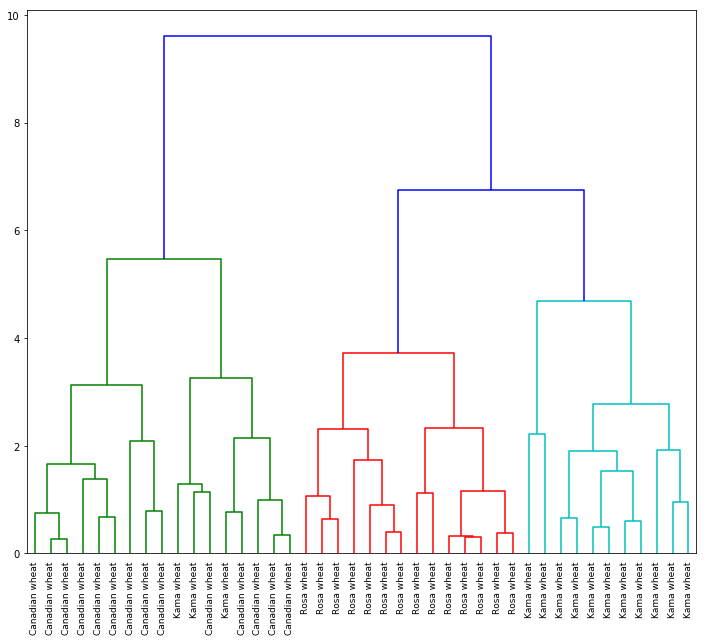

In [15]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(wheat_features, method='complete')
plt.figure(figsize=(12,10))
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=9,
)

plt.show()

#### LET'S APPLY on Financial Movements Data

In [16]:
movements=pd.read_csv("movements.csv", header=None, index_col=False, skiprows=1, usecols=range(1,964))
movements.head()

,1,2,3,4,5,6,7,8,9,10,...,954,955,956,957,958,959,960,961,962,963
0,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [17]:
companies=['Apple',
 'AIG',
 'Amazon',
 'American express',
 'Boeing',
 'Bank of America',
 'British American Tobacco',
 'Canon',
 'Caterpillar',
 'Colgate-Palmolive',
 'ConocoPhillips',
 'Cisco',
 'Chevron',
 'DuPont de Nemours',
 'Dell',
 'Ford',
 'General Electrics',
 'Google/Alphabet',
 'Goldman Sachs',
 'GlaxoSmithKline',
 'Home Depot',
 'Honda',
 'HP',
 'IBM',
 'Intel',
 'Johnson & Johnson',
 'JPMorgan Chase',
 'Kimberly-Clark',
 'Coca Cola',
 'Lookheed Martin',
 'MasterCard',
 'McDonalds',
 '3M',
 'Microsoft',
 'Mitsubishi',
 'Navistar',
 'Northrop Grumman',
 'Novartis',
 'Pepsi',
 'Pfizer',
 'Procter Gamble',
 'Philip Morris',
 'Royal Dutch Shell',
 'SAP',
 'Schlumberger',
 'Sony',
 'Sanofi-Aventis',
 'Symantec',
 'Toyota',
 'Total',
 'Taiwan Semiconductor Manufacturing',
 'Texas instruments',
 'Unilever',
 'Valero Energy',
 'Walgreen',
 'Wells Fargo',
 'Wal-Mart',
 'Exxon',
 'Xerox',
 'Yahoo']

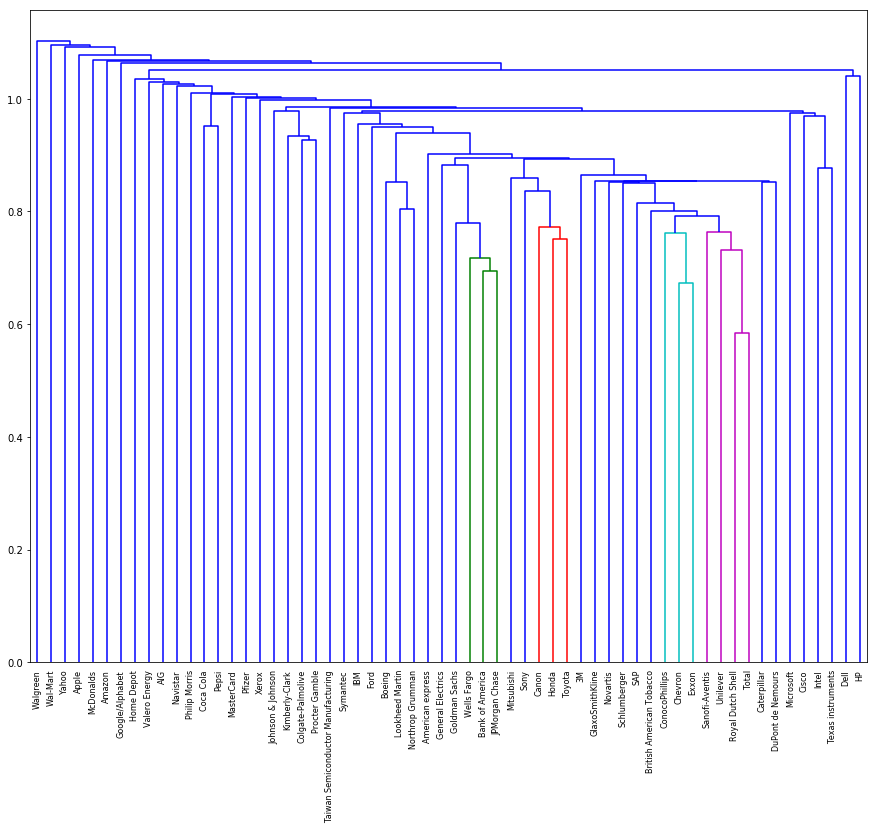

In [18]:
# Import required packages for pre and post processing
from sklearn.preprocessing import normalize

movementss=movements.values
# Any Pre-processing needed?
normalized_movements = normalize(movementss)
plt.figure(figsize=(15,12))

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='single')
#ward, complete, single
#"Your code here"
# Plot the dendrogram
dendrogram(
    mergings,
    labels=companies,
    leaf_rotation=90.,
    leaf_font_size=8
)


#"Your code here"
plt.show()


In [19]:
df=pd.read_csv("eurovision.csv")

#df = df.groupby('Televote Rank').nunique()
#df['avg'] = df[['Jury Points', 'Televote Points']].mean(axis=1)

In [20]:
df.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [21]:
# We need to convert dataframe into following format
dff = pd.pivot_table(df, values = 'Televote Points', index = 'From country', columns = 'To country')
                    #aggfunc = df.mean)

# Your code is here





In [22]:
dff.head()

To country,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,France,Georgia,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,
Albania,2.0,12.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,...,4.0,NaN,5.0,7.0,NaN,NaN,3.0,NaN,6.0,NaN
Armenia,NaN,NaN,4.0,NaN,NaN,NaN,NaN,6.0,7.0,8.0,...,NaN,5.0,1.0,12.0,NaN,NaN,2.0,NaN,10.0,NaN
Australia,NaN,NaN,3.0,NaN,12.0,10.0,NaN,NaN,7.0,NaN,...,1.0,6.0,NaN,5.0,NaN,2.0,NaN,NaN,8.0,4.0
Austria,NaN,3.0,NaN,NaN,NaN,5.0,NaN,NaN,1.0,NaN,...,NaN,NaN,12.0,8.0,4.0,NaN,7.0,6.0,10.0,NaN
Azerbaijan,NaN,2.0,NaN,NaN,NaN,8.0,NaN,NaN,4.0,1.0,...,NaN,5.0,3.0,12.0,NaN,NaN,NaN,NaN,10.0,NaN


In [23]:
dff.fillna(value=0, axis=0, inplace=True)
dff

To country,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,France,Georgia,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,
Albania,2.0,12.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,4.0,0.0,5.0,7.0,0.0,0.0,3.0,0.0,6.0,0.0
Armenia,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,7.0,8.0,...,0.0,5.0,1.0,12.0,0.0,0.0,2.0,0.0,10.0,0.0
Australia,0.0,0.0,3.0,0.0,12.0,10.0,0.0,0.0,7.0,0.0,...,1.0,6.0,0.0,5.0,0.0,2.0,0.0,0.0,8.0,4.0
Austria,0.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,...,0.0,0.0,12.0,8.0,4.0,0.0,7.0,6.0,10.0,0.0
Azerbaijan,0.0,2.0,0.0,0.0,0.0,8.0,0.0,0.0,4.0,1.0,...,0.0,5.0,3.0,12.0,0.0,0.0,0.0,0.0,10.0,0.0
Belarus,7.0,1.0,0.0,8.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,12.0,0.0,0.0,2.0,0.0,10.0,0.0
Belgium,7.0,4.0,3.0,0.0,0.0,5.0,0.0,0.0,8.0,0.0,...,0.0,0.0,12.0,6.0,0.0,0.0,1.0,10.0,2.0,0.0
Bosnia & Herzegovina,0.0,3.0,5.0,8.0,0.0,2.0,10.0,0.0,4.0,0.0,...,0.0,0.0,0.0,6.0,12.0,0.0,0.0,0.0,7.0,0.0
Bulgaria,8.0,5.0,4.0,1.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,6.0,12.0,0.0,0.0,3.0,0.0,10.0,0.0


In [24]:
eurovision=dff.values

In [25]:
country_names=['Albania',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia & Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'F.Y.R. Macedonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Latvia',
 'Lithuania',
 'Malta',
 'Moldova',
 'Montenegro',
 'Norway',
 'Poland',
 'Russia',
 'San Marino',
 'Serbia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'The Netherlands',
 'Ukraine',
 'United Kingdom']

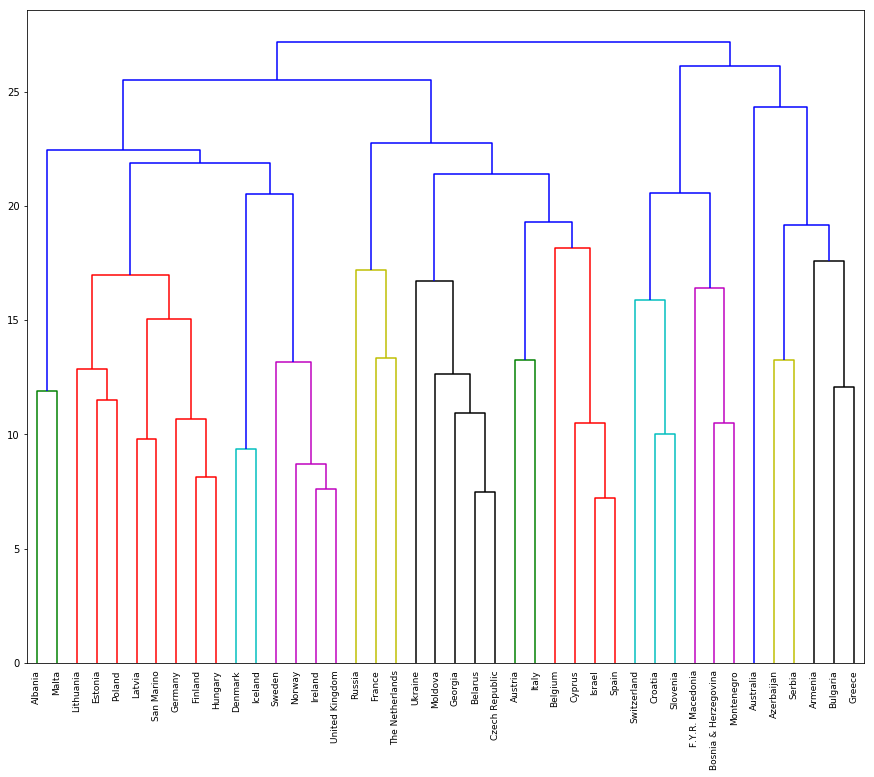

In [26]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram


# Calculate the linkage: mergings
plt.figure(figsize=(15,12))

mergings = linkage(eurovision, method='complete')

# Plot the dendrogram

dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=9,
)


plt.show()

In [27]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram


# Calculate the linkage: mergings with a different method ward, complete or single
plt.figure(figsize=(12,10))


"Your code here"





plt.show()

<Figure size 864x720 with 0 Axes>

In [28]:
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels

labels=fcluster(mergings,15,criterion='distance')

# Create a DataFrame with labels and countries as columns: df
pairs= pd.DataFrame({'labels': labels, 'countries': country_names})

print (pairs.sort_values('labels'))


    labels             countries
0        1               Albania
27       1                 Malta
31       2                Poland
26       2             Lithuania
13       2               Estonia
33       3            San Marino
25       3                Latvia
18       4               Germany
15       4               Finland
20       4               Hungary
12       5               Denmark
21       5               Iceland
41       6        United Kingdom
37       6                Sweden
30       6                Norway
22       6               Ireland
39       7       The Netherlands
16       7                France
32       8                Russia
28       9               Moldova
5        9               Belarus
17       9               Georgia
11       9        Czech Republic
40      10               Ukraine
24      11                 Italy
3       11               Austria
10      12                Cyprus
23      12                Israel
36      12                 Spain
6       13

### t-SNE (t-Distributed Stochastic Neighbor Embedding)

In [29]:
dataset = pd.read_csv('Iris.csv')
#


x = dataset.iloc[:, [1, 2, 3, 4]].values
species_iris=dataset.iloc[:,[5]]#.values[:,0]

In [30]:
# This part is if I want to visualize clusters with K-Means

#from sklearn.cluster import KMeans
# We build our model assuming three clusters
#k_means = KMeans(n_clusters=3, n_init=10)

# We fit our data to assign classes
#k_means.fit(x)

# Obtain the predictions
#labels= k_means.predict(x)

In [31]:
species=species_iris['Species'].astype('category').cat.codes

In [32]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model=TSNE(learning_rate=100)
Tsne_transformed=model.fit_transform(x)


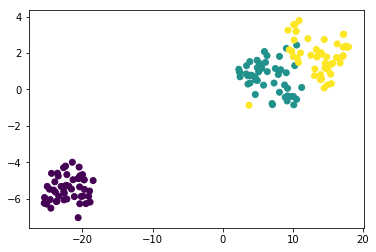

In [33]:
xs =Tsne_transformed[:,0]
ys=Tsne_transformed[:,1]
plt.scatter(xs,ys, c=species)
plt.show()

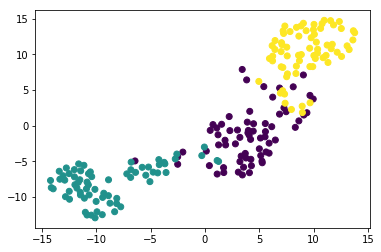

In [34]:


dataset = pd.read_csv('seeds_dataset.csv')
#seeds=pd.read_csv("seeds_dataset.csv", usecols=[0,1,2,3,4,5,6])


seeds= dataset.iloc[:, [0,1, 2, 3, 4,5,6]].values

varieties=pd.read_csv("seeds_dataset.csv", usecols=[7])


#if we want to visualize after clustering use preds
#from sklearn.cluster import KMeans
# We build our model assuming three clusters
#k_means = KMeans(n_clusters=3, n_init=10)

# We fit our data to assign classes 
#k_means.fit(seeds)

# Obtain the predictions
#preds= k_means.predict(seeds)

#if we want to just to see dimension reduction please ignore above 

labels=varieties.values
result = labels[:, 0]

# Import TSNE
from sklearn.manifold import TSNE
#print(species)
# Create a TSNE instance: model

model = TSNE(learning_rate=150)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(seeds)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
#plt.scatter(xs, ys, c=preds)
plt.scatter(xs, ys, c=result)
plt.show()

https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw

https://lvdmaaten.github.io/tsne/

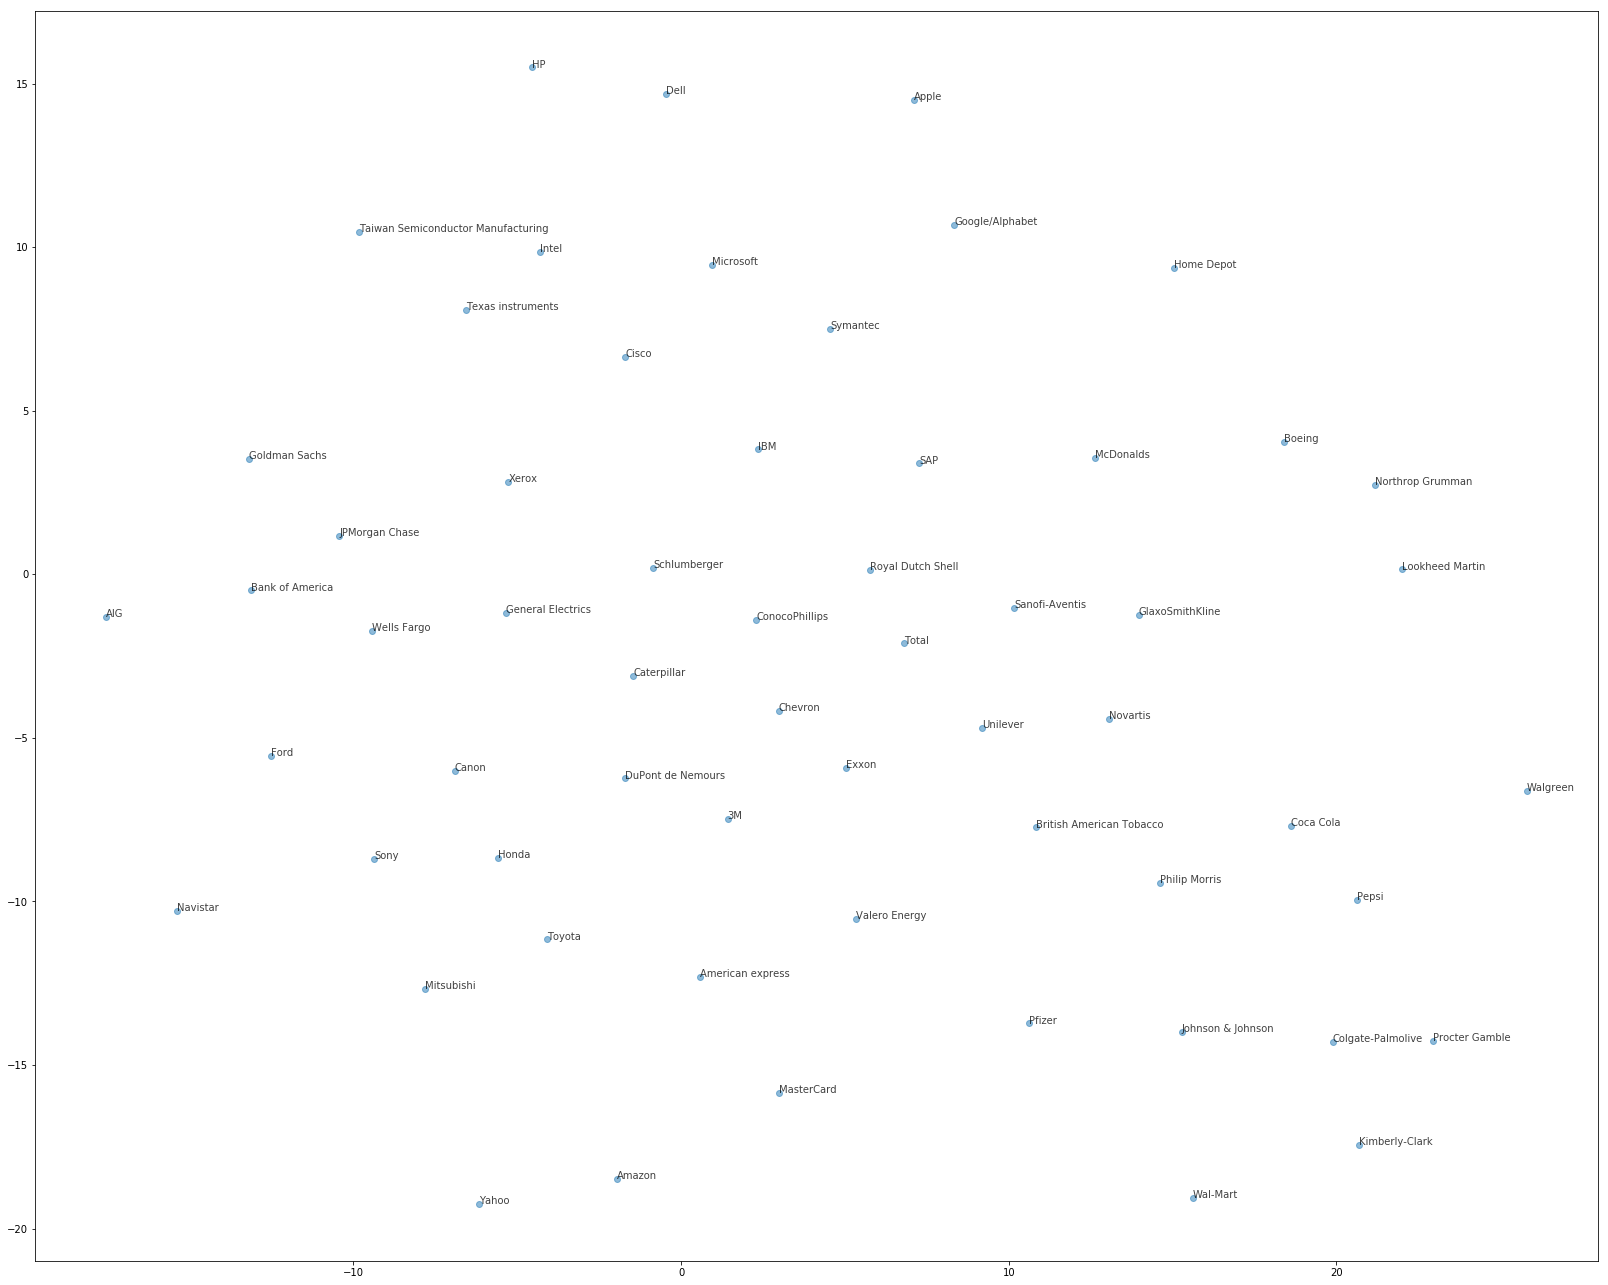

In [40]:
# Import normalize
from sklearn.preprocessing import normalize
#movements=pd.read_csv("movements.csv", header=None, index_col=False, skiprows=1, usecols=range(1,964))

movementss=movements.values

# Normalize the movements: normalized_movements
normalized_movements = normalize(movementss)



# Import TSNE
from sklearn.manifold import TSNE


plt.figure(figsize=(28,23))



# Create a TSNE instance: model
model = TSNE(learning_rate=120)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)
# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=10, alpha=0.75)
#plt.figure(figsize=(18,20))
plt.show()

## Dimension Reduction with PCA

#### Revisit the Seeds dataset 
This time lets pick only two features -width & length

In [60]:
new_seeds=seeds[:, 3:5]

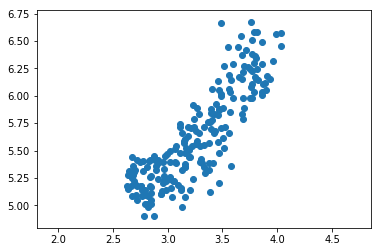

In [61]:
from scipy.stats import pearsonr

# Assign the 1th column of new_seeds: width
width = new_seeds[:,1]

# Assign the 0st column of new_seeds: length
length = new_seeds[:,0]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

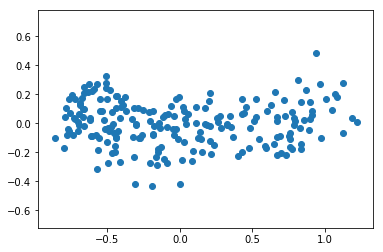

-4.9848704675665544e-17


In [62]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to new_seeds: pca_features
pca_features = model.fit_transform(new_seeds)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

[5.62788995 3.25834928]


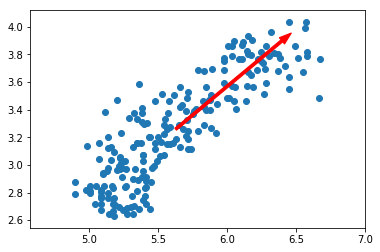

In [63]:
plt.scatter(new_seeds[:,0], new_seeds[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(new_seeds)

# Get the mean of the seeds samples: mean
mean = model.mean_
print(mean)
# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.02)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [64]:
fishes=pd.read_csv("/Users/xuxp001/Documents/Data Mining Principles/Week-3/fish.csv", header=None, index_col=False, skiprows=1, usecols=range(1,7))

fishes.head()

,1,2,3,4,5,6
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


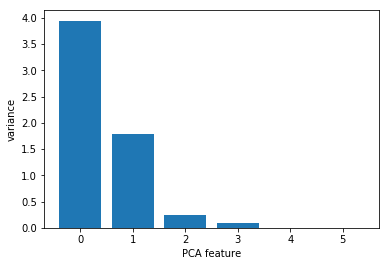

In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(fishes)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [66]:
# Import PCA
from sklearn.decomposition import PCA



stscaler = StandardScaler().fit(fishes)
scaled_fishes = stscaler.transform(fishes)
# Create a PCA instance with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_fishes)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_fishes)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


In [67]:
fishes.shape

(85, 6)

You may want to try two new features from fish data to visualize clustering model of your choice

https://blog.lateral.io/category/data/

### Truncated SVD and Text Mining
(Detailed analysis is in NLP_SVD notebook)

In [68]:
tweets=['cats say meow', 'dogs say woof', 'dogs chase cats']
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(tweets)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


In [69]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)


https://medium.freecodecamp.org/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3

### Variance Analysis - Iris Data

In [71]:
import pandas as pd
from sklearn.decomposition import PCA

import numpy as np
# Load the Iris Data
iris = pd.read_csv('data/Iris.csv')
    
# Now lets get the data and labels
data = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
#labels = np.array([i//50 for i in range(iris.shape[0])])

  
# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA()

# Fit model to the data
pca.fit(data)

# We can print out rotation matrix and variance associated with each
# projected dimension

vars = pca.explained_variance_ratio_
c_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

print('Variance:  Projected dimension')
print('------------------------------')
for idx, row in enumerate(pca.components_):
    output = '{0:4.1f}%:    '.format(100.0 * vars[idx])
    output += " + ".join("{0:5.2f} * {1:s}".format(val, name) \
                      for val, name in zip(row, c_names))
    print(output)

Variance:  Projected dimension
------------------------------
92.5%:     0.36 * SepalLength + -0.08 * SepalWidth +  0.86 * PetalLength +  0.36 * PetalWidth
 5.3%:     0.66 * SepalLength +  0.73 * SepalWidth + -0.18 * PetalLength + -0.07 * PetalWidth
 1.7%:    -0.58 * SepalLength +  0.60 * SepalWidth +  0.07 * PetalLength +  0.55 * PetalWidth
 0.5%:     0.32 * SepalLength + -0.32 * SepalWidth + -0.48 * PetalLength +  0.75 * PetalWidth


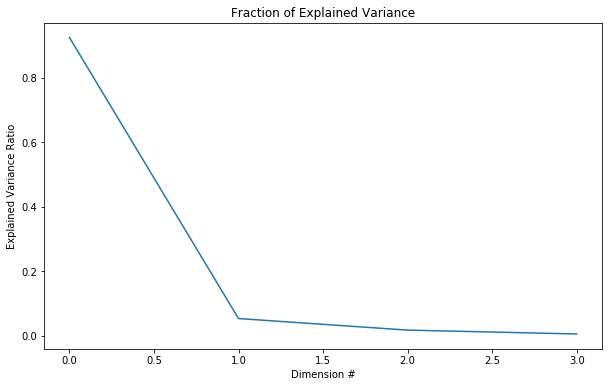

In [72]:
fig, ax = plt.subplots(figsize=(10,6))

# Decorate the plot
ax.set_xlabel('Dimension #')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Fraction of Explained Variance')
ax.plot(pca.explained_variance_ratio_)

http://www.lauradhamilton.com/introduction-to-principal-component-analysis-pca

http://sebastianraschka.com/Articles/2014_pca_step_by_step.html

http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf

http://disp.ee.ntu.edu.tw/~pujols/Dimensionality%20Reduction.pdf

http://seaborn.pydata.org/tutorial/distributions.html

http://ned.ipac.caltech.edu/level5/March02/Silverman/Silver_contents.html

### SEABORN Visualization

In [1]:
% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")


sns.set(style="white")

# Load the Iris Data
dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


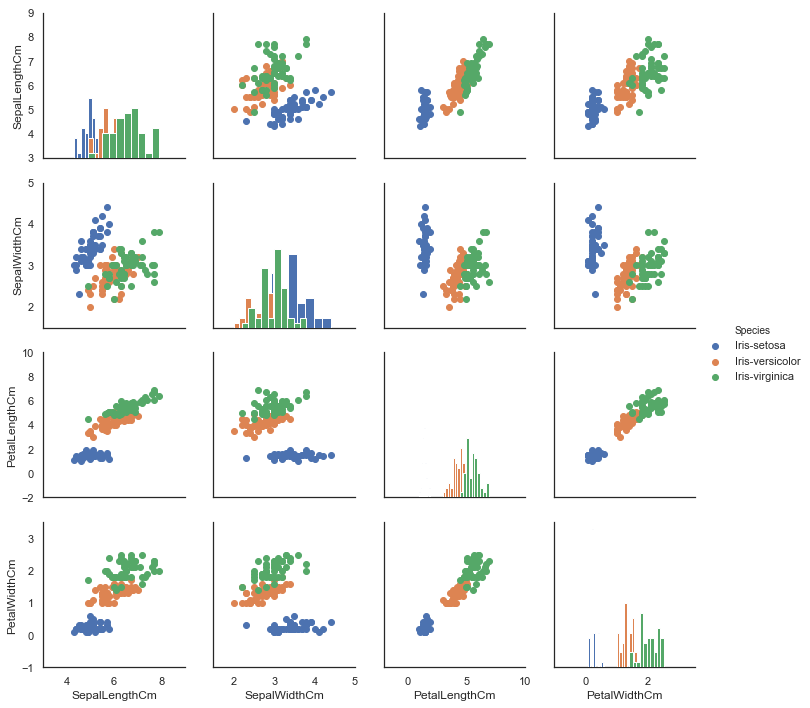

In [3]:
% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")


sns.set(style="white")

# Load the Iris Data
dataset = pd.read_csv('Iris.csv')
iris_pca = dataset.iloc[:, [1, 2, 3, 4, 5]]

# Make pair plot
g = sns.PairGrid(iris_pca, hue="Species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

# Lets explicitly set the axes limits
axes = g.axes

lim = [(3, 9), (1.5, 5), (-2, 10), (-1, 3.5)]

for i in range(len(lim)):
    for j in range(len(lim)):
        axes[i, j].set_xlim(lim[j])
        axes[i, j].set_ylim(lim[i])

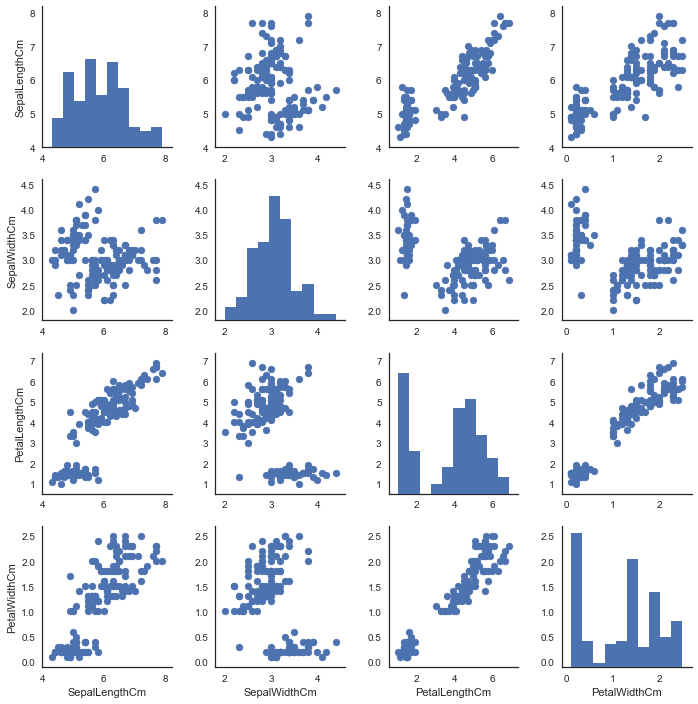

In [74]:
# more simple version
sns.set(style="white")

# Load the Iris Data
dataset = pd.read_csv('Iris.csv')
iris_pca = dataset.iloc[:, [1, 2, 3, 4, 5]]

#df2 = df[['column1', 'column2', 'column3', 'column4']]
g = sns.PairGrid(iris_pca)
g = g.map_offdiag(plt.scatter)
ax = g.map_diag(plt.hist)

In [63]:
labels=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])